# Cohort Analysis

In this analysis, I will perform Data Cleaning, ARPU, ARPPU, MAU, and Cohort Analysis using the Jewler.csv dataset from Kaggle. These analyses will help uncover key trends in customer purchasing behavior, such as how much users are spending over time, how frequently new users are joining each month, and how well the platform retains those users over specific periods

Data Source: https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-jewelry-store/data

- ARPU (Average Revenue Per User) </br>
Measures the average revenue generated per user in a given time period. </br>
➤ Helps you understand overall monetization efficiency.

- ARPPU (Average Revenue Per Paying User) </br>
Measures the average revenue from only the users who made purchases in a month in this case. </br>
➤ Gives deeper insight into spending behavior among paying customers.

- MAU (Monthly Active Users) </br>
Counts how many unique users engaged with the platform in a given month. </br>
➤ Shows growth and engagement trends over time.

- Cohort Analysis </br>
Groups users by when they first interacted with the platform and tracks their behavior over time. </br>
➤ Helps measure retention, user loyalty, and the long-term value of customer segments.

In [2]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pytz

In [3]:
# read csv file
# The Data source is from "!kaggle datasets download -d mkechinov/ecommerce-purchase-history-from-jewelry-store"

columns = ["order_date", "order_id", "product_id", "quantity", "category_id", "category_code", 
           "brand", "price", "user_id", "gender", "color", "metal", "gem"]

df = pd.read_csv("./Resources/jewelry.csv", header=None, names=columns, skiprows=1)
df.head()


,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst


In [4]:
df.dtypes

order_date        object
order_id           int64
product_id         int64
quantity           int64
category_id      float64
category_code     object
brand            float64
price            float64
user_id          float64
gender            object
color             object
metal             object
gem               object
dtype: object

In [5]:
df.shape

(95911, 13)

In [6]:
# datatype category can be faster load than object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_date     95911 non-null  object 
 1   order_id       95911 non-null  int64  
 2   product_id     95911 non-null  int64  
 3   quantity       95911 non-null  int64  
 4   category_id    90559 non-null  float64
 5   category_code  85978 non-null  object 
 6   brand          91126 non-null  float64
 7   price          90559 non-null  float64
 8   user_id        90559 non-null  float64
 9   gender         47743 non-null  object 
 10  color          88251 non-null  object 
 11  metal          90449 non-null  object 
 12  gem            61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [7]:
df.describe()

,order_id,product_id,quantity,category_id,brand,price,user_id
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [8]:
# This will show the summary of dataset with category 
df.describe(exclude="number")

,order_date,category_code,gender,color,metal,gem
count,95911,85978,47743,88251,90449,61853
unique,74505,218,2,5,3,30
top,2020-10-17 12:58:28 UTC,jewelry.earring,f,red,gold,diamond
freq,26,29052,47379,69511,89082,29610


In [9]:
# This will show the summary of dataset with number only
df.describe(include='number')

,order_id,product_id,quantity,category_id,brand,price,user_id
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [10]:
# Help screen
# "Shift + Tab" will show the explanation of the function or
# "df.info?" will show the explanation
df.info?

In [11]:
# df is not available True = 1, False = 0
# this shows the sum of null values in each variable
# CustomerID? Why does User_id have null value?
df.isnull().sum()

order_date           0
order_id             0
product_id           0
quantity             0
category_id       5352
category_code     9933
brand             4785
price             5352
user_id           5352
gender           48168
color             7660
metal             5462
gem              34058
dtype: int64

In [12]:
# this shows 7.92% of user_id has no user_id, which could mean they did guest checkout
df.isnull().mean() * 100

order_date        0.000000
order_id          0.000000
product_id        0.000000
quantity          0.000000
category_id       5.580173
category_code    10.356476
brand             4.989000
price             5.580173
user_id           5.580173
gender           50.221560
color             7.986571
metal             5.694863
gem              35.510004
dtype: float64

In [13]:
df.describe()

,order_id,product_id,quantity,category_id,brand,price,user_id
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


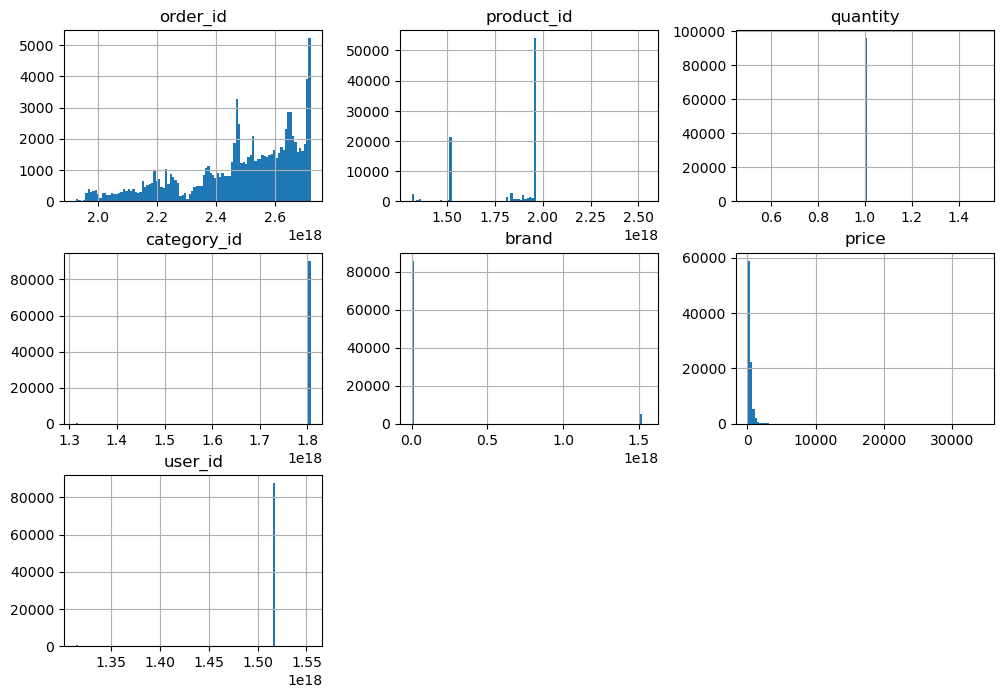

In [14]:
df.hist(figsize=(12,8), bins=100);

In [15]:
# convert 'order date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Convert directly if already timezone-aware
df['order_date'] = df['order_date'].dt.tz_convert('America/New_York')

In [16]:
# Analysis on the frequency of registered_customer or guest_checkout
# df["user_id"].isnull().value_counts(1) = df["user_id"].isnull().value_counts(normalize=True) 
df["user_id"].isnull().value_counts(normalize=True)

user_id
False    0.944198
True     0.055802
Name: proportion, dtype: float64

In [17]:
# Calculate the TotalRevenue by multiplying price and quantity
df["TotalRevenue"] = df["quantity"] * df["price"]

In [18]:
# Check whether any records with missing 'user_id' have a positive 'revenue'
check = df[df["user_id"].isnull()]
check[check["TotalRevenue"]>0]

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue


In [19]:
# List the value_counts of column "Gem" has "user_id"
df.loc[df["user_id"].notnull(), "gem"].value_counts()

gem
diamond                29610
fianit                 12051
topaz                   6318
pearl                   3632
garnet                  2704
sapphire                1866
amethyst                1632
mix                     1479
emerald                  833
quartz                   540
amber                    228
spinel                   156
ruby                     151
quartz_smoky              93
nanocrystal               88
nacre                     78
chrysolite                74
citrine                   51
tourmaline                50
sitall                    44
corundum_synthetic        41
coral                     41
agate                     24
turquoise                 22
rhodolite                 18
emerald_geothermal         9
chrysoprase                6
onyx                       6
garnet_synthetic           6
sapphire_geothermal        2
Name: count, dtype: int64

In [20]:
# Check if there are any rows with null values in the 'user_id' column
df.loc[~df["user_id"].notnull(), "order_id"].value_counts()

order_id
2581200805159764328    7
2374994954771497969    6
2634826374728123386    5
2627049304103060399    4
2709395093537685507    4
                      ..
2648053981057647167    1
2648055452360770152    1
2648058286921745063    1
2648061997261783813    1
2719016587653808559    1
Name: count, Length: 4826, dtype: int64

In [21]:
# Double check whether the rows with null values in user_id have revenue or not
missing_user_orders = df.loc[df["user_id"].isnull(), "order_id"]
df[df["order_id"].isin(missing_user_orders)]

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue
445,2019-01-26 00:51:21-05:00,1965130913738130034,1956663836819849607,1,1.806829e+18,jewelry.ring,0.000000e+00,280.68,1.550613e+18,f,white,gold,sapphire,280.68
446,2019-01-26 00:51:21-05:00,1965130913738130034,1937825427510789079,1,NaN,230.12,1.550613e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,2019-02-05 03:39:25-05:00,1972463258694582403,1536903766496772737,1,NaN,202.36,1.325156e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,2019-02-14 05:54:07-05:00,1979054038959784609,1515966222721436570,1,NaN,1098.03,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,2019-02-14 05:54:07-05:00,1979054038959784609,1463130437630034093,1,NaN,321.78,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95891,2021-12-01 03:58:49-05:00,2718992028972089719,1515966223638498936,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95892,2021-12-01 04:05:55-05:00,2718995597712425499,1515966223677246857,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95894,2021-12-01 04:14:01-05:00,2718999678082351855,1536902230743974482,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95902,2021-12-01 04:33:22-05:00,2719009418078322840,1465165964994675113,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df[df["user_id"].isnull()]

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue
446,2019-01-26 00:51:21-05:00,1965130913738130034,1937825427510789079,1,NaN,230.12,1.550613e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,2019-02-05 03:39:25-05:00,1972463258694582403,1536903766496772737,1,NaN,202.36,1.325156e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,2019-02-14 05:54:07-05:00,1979054038959784609,1515966222721436570,1,NaN,1098.03,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,2019-02-14 05:54:07-05:00,1979054038959784609,1463130437630034093,1,NaN,321.78,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,2019-02-14 05:55:34-05:00,1979054768877732525,1515966222725319293,1,NaN,1128.62,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95891,2021-12-01 03:58:49-05:00,2718992028972089719,1515966223638498936,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95892,2021-12-01 04:05:55-05:00,2718995597712425499,1515966223677246857,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95894,2021-12-01 04:14:01-05:00,2718999678082351855,1536902230743974482,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95902,2021-12-01 04:33:22-05:00,2719009418078322840,1465165964994675113,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df = df.dropna(subset=["user_id"])

In [24]:
df["user_id"].isnull().sum()  # should return 0

0

In [25]:
df["user_id"].isnull().value_counts(normalize=True)

user_id
False    1.0
Name: proportion, dtype: float64

In [26]:
df.shape

(90559, 14)

### ARPU (Average Revenue Per User)

Measures the average revenue generated per user in a given time period.
ARPU = Revenue / The number of Unique Customer

### ARPPU (Average Revenue Per Paying User) 
measures the average revenue generated by each paying customer over a specific period

In [32]:
ARPU = df.groupby("user_id").agg({
    "TotalRevenue":"sum"
})
ARPU.sort_values('TotalRevenue', ascending=False)

,TotalRevenue
user_id,
1.515916e+18,458708.74
1.515916e+18,284892.01
1.515916e+18,270577.74
1.515916e+18,258134.87
1.515916e+18,254817.45
...,...
1.491835e+18,6.47
1.515916e+18,5.00
1.515916e+18,3.84


In [33]:
# Calculate the first order date ['FirstOrderDate']
df['FirstOrderDate'] = df.groupby(['user_id'])['order_date'].transform("min")

# Extract Year and Month from the FirstOrderDate column 'FirstOrderYM' 
df['FirstOrderYM'] = df['FirstOrderDate'].astype(str).str[:7]

# Extract Year and Month and create column "OrderYM"

df["OrderYM"] = df['order_date'].astype(str).str[:7]

# Show 5 random rows of the df
df.sample(5)

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue,FirstOrderDate,FirstOrderYM,OrderYM
54086,2021-04-25 03:58:08-04:00,2559510821671534972,1956663830696165595,1,1.806829e+18,jewelry.pendant,0.0,131.37,1.515916e+18,f,red,gold,NaN,131.37,2021-04-25 03:58:08-04:00,2021-04,2021-04
84326,2021-10-24 09:51:32-04:00,2691597876827521703,1515966223043990009,1,1.806829e+18,jewelry.earring,0.0,328.63,1.515916e+18,NaN,red,gold,NaN,328.63,2019-01-24 10:49:32-05:00,2019-01,2021-10
71522,2021-08-18 16:54:37-04:00,2643250848339067067,1924582891589731058,1,1.806829e+18,jewelry.ring,0.0,209.81,1.515916e+18,NaN,red,gold,NaN,209.81,2021-08-18 16:54:37-04:00,2021-08,2021-08
91174,2021-11-21 10:45:24-05:00,2711948907356619393,1956663845736939731,1,1.806829e+18,NaN,0.0,1248.73,1.515916e+18,NaN,red,gold,NaN,1248.73,2021-11-15 16:52:47-05:00,2021-11,2021-11
29298,2020-10-29 04:36:57-04:00,2430520277176681323,1956663831291756567,1,1.806829e+18,NaN,0.0,229.81,1.515916e+18,NaN,red,gold,NaN,229.81,2020-09-28 03:04:00-04:00,2020-09,2020-10


In [34]:
# Get ARPPU
arppu = df.groupby(["OrderYM"]).agg({
    "TotalRevenue":"sum",
    "user_id": "nunique"
})

arppu["ARPPU"] = arppu["TotalRevenue"] / arppu["user_id"]
arppu.head()

,TotalRevenue,user_id,ARPPU
OrderYM,,,
2018-12,33935.77,66,514.178333
2019-01,191471.91,207,924.985072
2019-02,240664.70,282,853.420922
2019-03,216511.73,283,765.059117
2019-04,229081.68,241,950.546390


<Axes: title={'center': 'ARPPU'}, xlabel='OrderYM'>

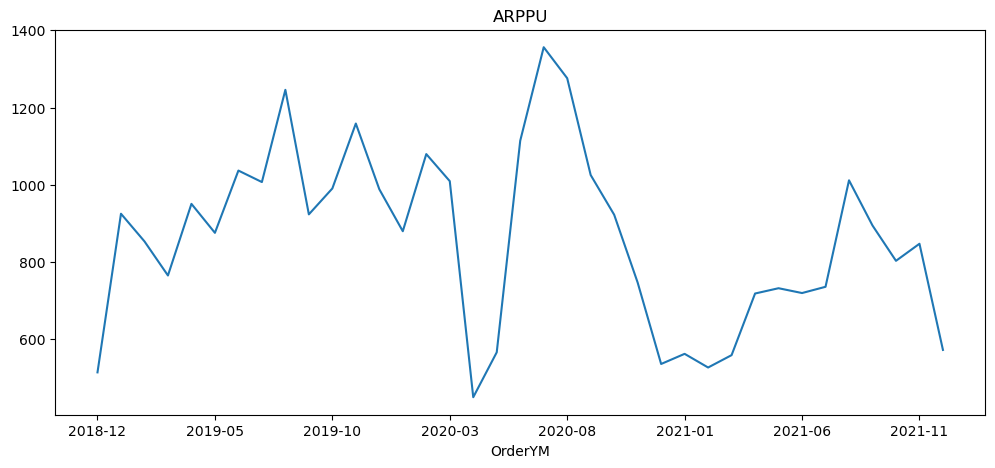

In [35]:
arppu["ARPPU"].plot(figsize=(12,5), title="ARPPU")

<Axes: title={'center': 'Revenue'}, xlabel='OrderYM'>

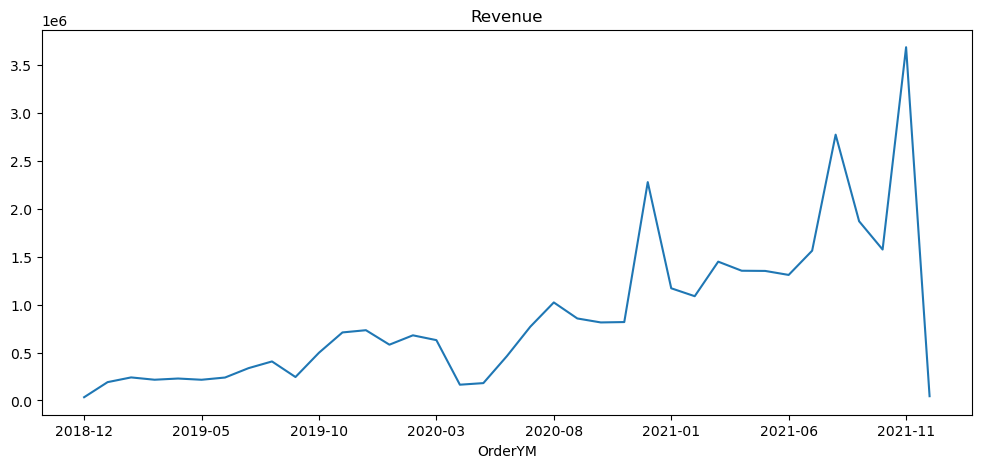

In [37]:
arppu["TotalRevenue"].plot(figsize=(12,5), title="Revenue")

<Axes: title={'center': 'customers'}, xlabel='OrderYM'>

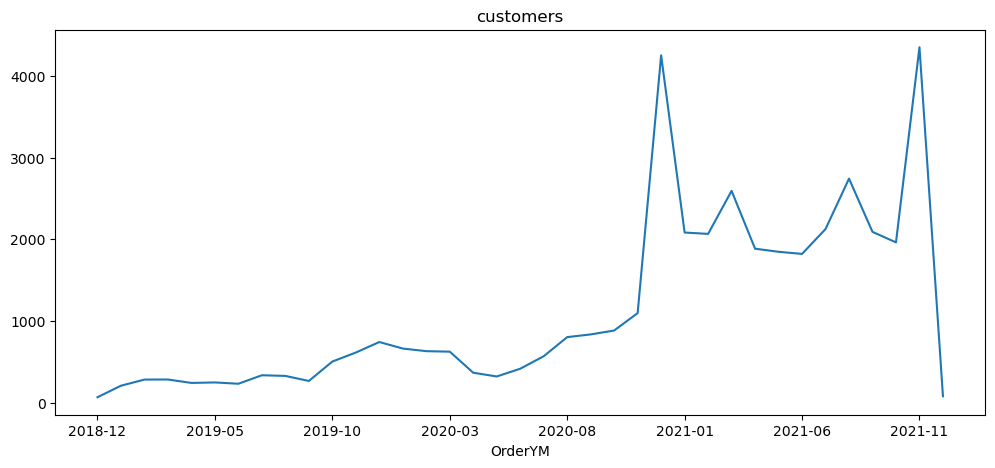

In [38]:
arppu["user_id"].plot(figsize=(12,5), title="customers")

In [39]:
# customer order frequency
cust_agg = df.groupby(["user_id"]).agg({
    "order_id":"count",
    "TotalRevenue":["mean","sum"]
}).sort_values(("order_id", "count"), ascending=False)

cust_agg.head()

order_id TotalRevenue           
                count         mean        sum
user_id                                      
1.515916e+18     1068   429.502566  458708.74
1.515916e+18      696   388.761121  270577.74
1.515916e+18      540   527.577796  284892.01
1.515916e+18      509   500.623674  254817.45
1.515916e+18      480   537.780979  258134.87

In [40]:
cust_agg.describe()

order_id  TotalRevenue               
              count          mean            sum
count  31079.000000  31079.000000   31079.000000
mean       2.913832    316.038405    1055.434470
std       14.510317    354.212469    6455.688487
min        1.000000      1.030000       1.030000
25%        1.000000    136.850000     165.620000
50%        1.000000    232.740000     335.480000
75%        2.000000    378.670000     698.360000
max     1068.000000  15599.180000  458708.740000

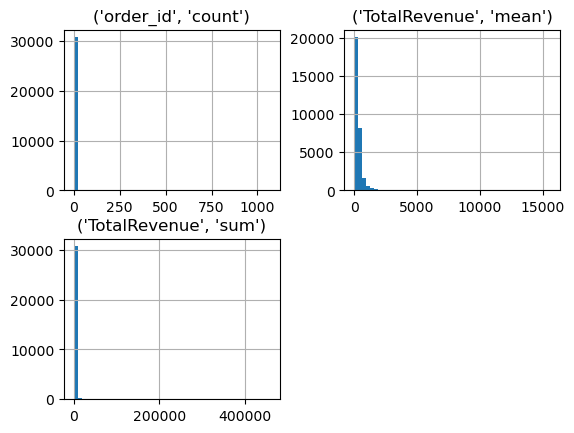

In [41]:
cust_agg.hist(bins=50);

### Cohort Analysis
A cohort is a group of people sharing common characteristics over a specified period. cohort table visualization is useful, for example, when you want to learn how a cohort engages with a brand. you can easily spot changes in trends, then respond accordingly.

* What's the months from the first month of the purchase?

In [50]:
# Get the most recent order date (This can be vary depending on what time range analyst wants to see)
# In this analysis, I am going to extract the last 12 months order history and implement data processing
MostRecentOrder = df['order_date'].max()

# Setting up the start_date within an year from the MostRecentOrder

start_date = MostRecentOrder - pd.DateOffset(months=12)

# Filtered out data older than 12 months and assign df with filtered one

df = df[df['order_date'] > start_date]

df.head(3)

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue,FirstOrderDate,FirstOrderYM,OrderYM,CohortIndex
31994,2020-12-01 05:16:47-05:00,2454488130619703495,1839888168183137191,1,1.806829e+18,jewelry.pendant,NaN,116.33,1.515916e+18,NaN,white,gold,diamond,116.33,2020-12-01 03:59:22-05:00,2020-12,2020-12,1
31995,2020-12-01 05:35:40-05:00,2454497633394229610,1515966223023793081,1,1.806829e+18,jewelry.ring,0.0,403.97,1.515916e+18,NaN,white,gold,diamond,403.97,2020-12-01 03:52:07-05:00,2020-12,2020-12,1
31996,2020-12-01 05:43:11-05:00,2454501412093034926,1806829194307436609,1,1.806829e+18,jewelry.bracelet,0.0,970.64,1.515916e+18,NaN,red,gold,NaN,970.64,2019-07-21 08:51:03-04:00,2019-07,2020-12,18


In [59]:
# Reset the "FirstOrderDate" , "FirstOrderYM", and "OrderYM" with filtered df

# Calculate the first order date ['FirstOrderDate']
df['FirstOrderDate'] = df.groupby(['user_id'])['order_date'].transform("min")

# Extract Year and Month from the FirstOrderDate column 'FirstOrderYM' 
df['FirstOrderYM'] = df['FirstOrderDate'].astype(str).str[:7]

# Extract Year and Month and create column "OrderYM"

df["OrderYM"] = df['order_date'].astype(str).str[:7]

# Show 5 random rows of the df
df.sample(5)

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue,FirstOrderDate,FirstOrderYM,OrderYM,CohortIndex
50146,2021-03-24 16:25:07-04:00,2536693966095516276,1956663836786295137,1,1.806829e+18,jewelry.pendant,0.0,68.36,1.515916e+18,f,red,gold,garnet,68.36,2021-02-19 08:02:55-05:00,2021-02,2021-03,2
47819,2021-03-07 04:09:18-05:00,2524032631423632187,1956663845644664920,1,1.806829e+18,jewelry.ring,1.0,431.37,1.515916e+18,NaN,red,gold,diamond,431.37,2021-03-07 04:09:18-05:00,2021-03,2021-03,1
86815,2021-11-09 10:07:31-05:00,2703232530579980335,1515966223497828666,1,1.806829e+18,jewelry.pendant,1.0,332.74,1.515916e+18,f,red,gold,fianit,332.74,2021-01-03 15:17:49-05:00,2021-01,2021-11,29
65407,2021-07-16 10:15:29-04:00,2619132357801673547,1836862474553394119,1,1.806829e+18,jewelry.earring,0.0,356.03,1.515916e+18,NaN,red,gold,diamond,356.03,2021-07-16 08:33:04-04:00,2021-07,2021-07,1
43285,2021-02-04 02:22:02-05:00,2501510595740696853,2315066251791040710,1,1.806829e+18,jewelry.ring,1.0,1343.34,1.515916e+18,f,red,gold,topaz,1343.34,2020-12-18 10:59:34-05:00,2020-12,2021-02,3


In [60]:
# Get year difference (year_diff) and month difference (month_diff)

# year_diff
year_diff = df['order_date'].dt.year - df['FirstOrderDate'].dt.year
# month_diff
month_diff = df['order_date'].dt.month - df['FirstOrderDate'].dt.month

In [61]:
# Create ["CohortIndex"] variable with "year_diff * 12 month + month_diff + 1" to calculate the number of month after the first purchase
# 
df["CohortIndex"] = (year_diff * 12) + month_diff + 1
df["CohortIndex"]

31994    1
31995    1
31996    1
31997    1
31998    1
        ..
95905    1
95907    1
95908    1
95909    1
95910    2
Name: CohortIndex, Length: 58854, dtype: int32

In [62]:
# View the columns w/ the first Order date
df[['user_id','order_date','FirstOrderDate']].sample(5)

,user_id,order_date,FirstOrderDate
59638,1.515916e+18,2021-06-06 01:37:39-04:00,2020-12-23 02:52:36-05:00
43551,1.515916e+18,2021-02-06 05:32:55-05:00,2021-02-06 05:32:55-05:00
50180,1.515916e+18,2021-03-25 03:56:25-04:00,2021-03-25 03:56:25-04:00
91681,1.515916e+18,2021-11-23 01:46:23-05:00,2021-11-23 01:46:23-05:00
95826,1.515916e+18,2021-12-01 02:14:52-05:00,2021-12-01 02:14:52-05:00


### Frequency of monthly retained purchases

In [63]:
# calculate the frequency of monthly retained purchases using the CohortIndex value
# calculate the monthly purchase frequency after membership registration using value_counts()
df["CohortIndex"].value_counts()

CohortIndex
1     41360
2      3788
3      2644
4      2352
5      1851
6      1769
7      1469
8      1232
9      1179
10      556
11      354
12      299
13        1
Name: count, dtype: int64

<Axes: xlabel='CohortIndex', ylabel='count'>

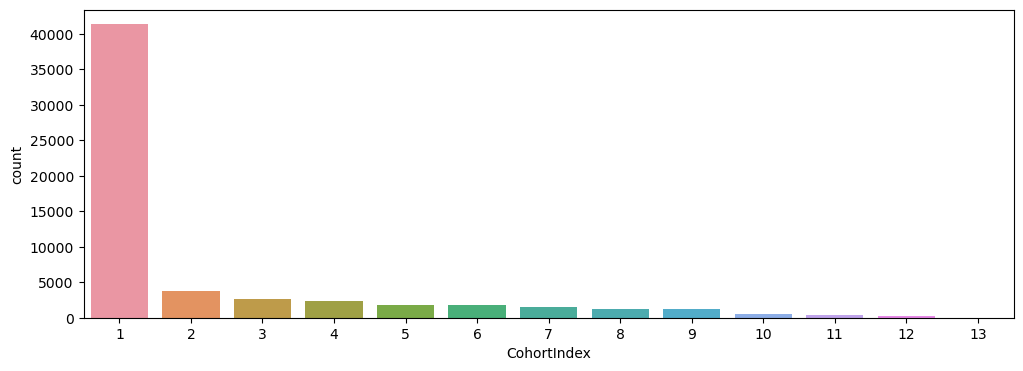

In [65]:
# visualize the frequency of CohortIndex with countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="CohortIndex")

### Calculating retention frequency

In [67]:
# Group by first_order_date and CohortIndex to calculate the frequency of unique CustomerID value
# Cohort_Count

cohort_count = df.groupby(["FirstOrderYM","CohortIndex"])["user_id"].nunique().unstack()
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstOrderYM,,,,,,,,,,,,,
2020-12,4241.0,221.0,154.0,146.0,120.0,98.0,99.0,107.0,90.0,67.0,59.0,72.0,1.0
2021-01,1862.0,65.0,50.0,41.0,27.0,20.0,23.0,25.0,20.0,18.0,23.0,NaN,NaN
2021-02,1847.0,86.0,42.0,31.0,28.0,31.0,21.0,18.0,25.0,21.0,NaN,NaN,NaN
2021-03,2311.0,116.0,76.0,72.0,80.0,74.0,68.0,60.0,55.0,1.0,NaN,NaN,NaN
2021-04,1566.0,97.0,55.0,73.0,49.0,40.0,27.0,35.0,1.0,NaN,NaN,NaN,NaN
2021-05,1518.0,77.0,46.0,48.0,39.0,22.0,32.0,1.0,NaN,NaN,NaN,NaN,NaN
2021-06,1470.0,81.0,48.0,43.0,36.0,40.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,1684.0,92.0,59.0,35.0,36.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,2296.0,135.0,81.0,85.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# print the color maps
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

<Axes: xlabel='CohortIndex', ylabel='FirstOrderYM'>

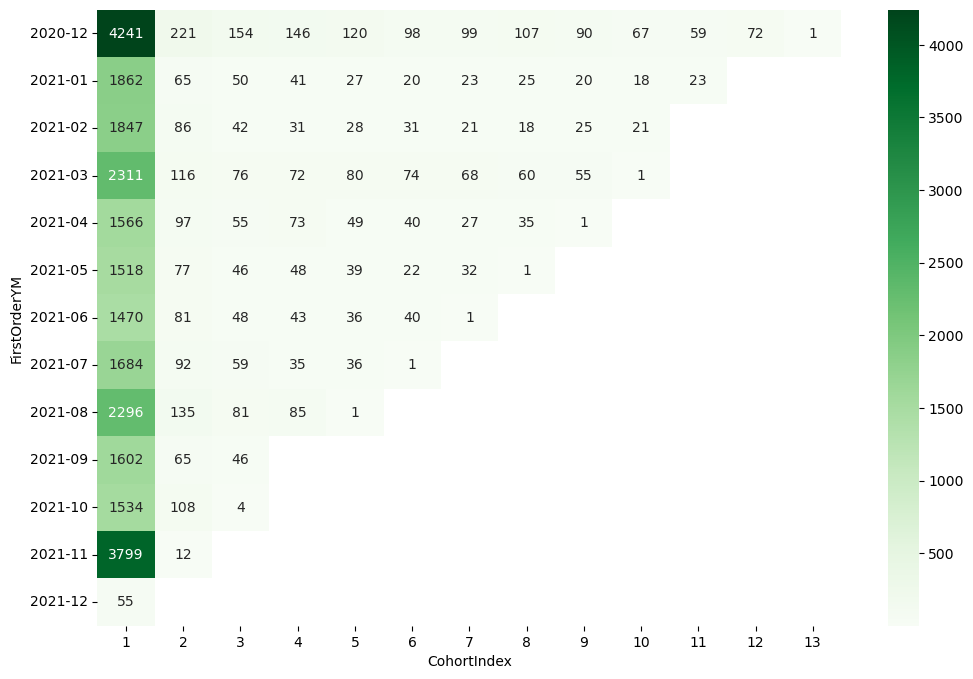

In [69]:
# Visualize the calculated retention numbers using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cohort_count, cmap="Greens", annot=True, fmt=".0f")

### Monthly New Acquisitions

In [70]:
# cohort_count[1]
cohort_count[1]

FirstOrderYM
2020-12    4241.0
2021-01    1862.0
2021-02    1847.0
2021-03    2311.0
2021-04    1566.0
2021-05    1518.0
2021-06    1470.0
2021-07    1684.0
2021-08    2296.0
2021-09    1602.0
2021-10    1534.0
2021-11    3799.0
2021-12      55.0
Name: 1, dtype: float64

<Axes: title={'center': 'Monthly Acquisition'}, xlabel='FirstOrderYM'>

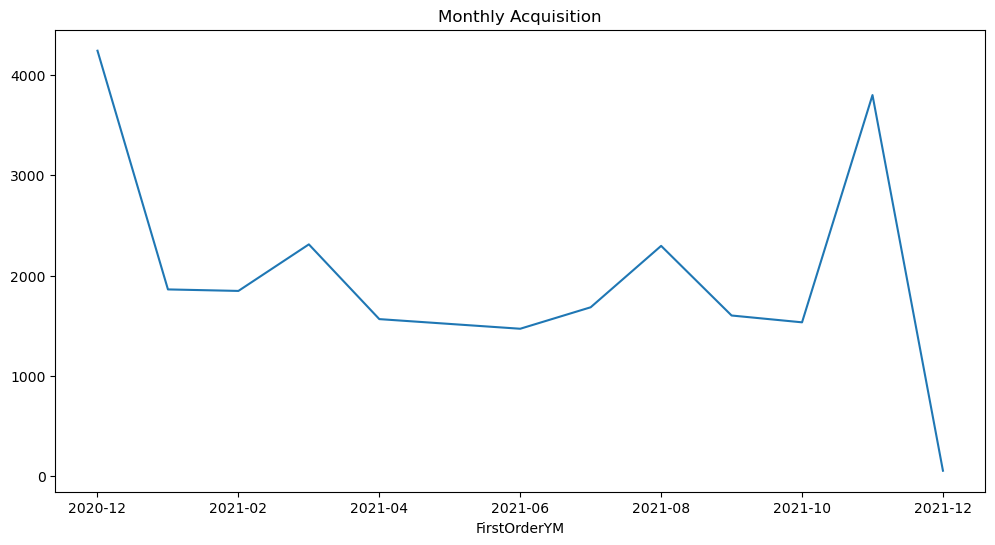

In [71]:
cohort_count[1].plot(figsize=(12,6), title="Monthly Acquisition")

### Retention Rate

In [72]:
# By dividing by the first month, we can calculate the retention rate.
# Using div, we perform the division, and setting axis=0 ensures that all subsequent months are divided by the first month.

cohort_norm = cohort_count.div(cohort_count[1], axis=0)

<Axes: xlabel='CohortIndex', ylabel='FirstOrderYM'>

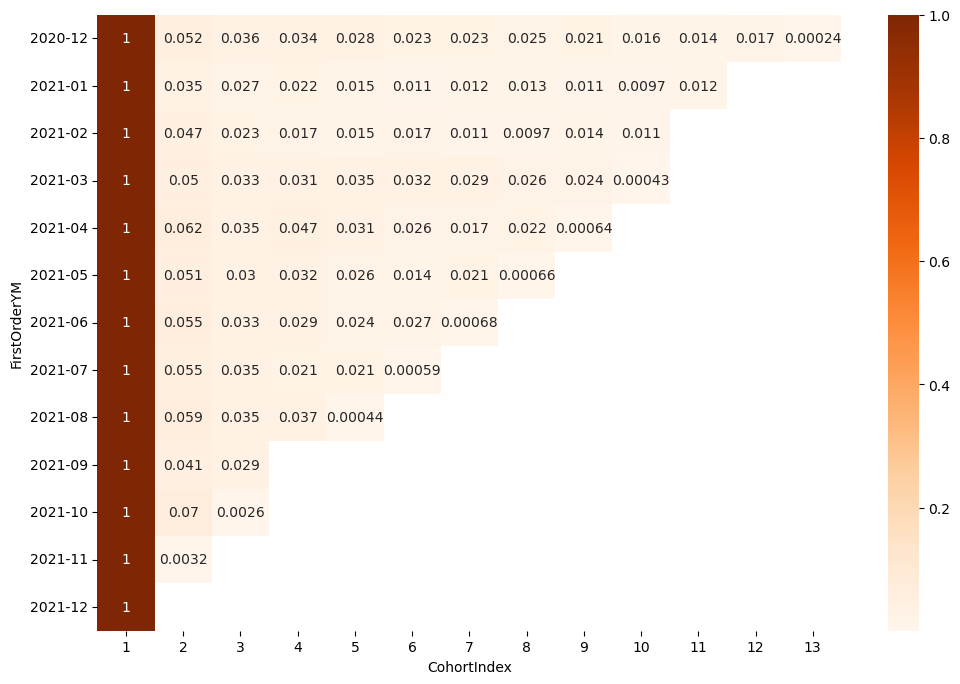

In [73]:
# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cohort_norm, cmap="Oranges", annot=True)

### Customer Sales

In [75]:
cohort_total_price = df.groupby(["FirstOrderYM", "CohortIndex"])["TotalRevenue"].sum().unstack()
cohort_total_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstOrderYM,,,,,,,,,,,,,
2020-12,2265571.99,320836.96,280564.80,261533.27,231381.36,230919.82,223739.92,233842.40,272307.85,172749.80,131199.28,122782.81,354.07
2021-01,850131.99,51780.46,53906.43,42763.53,29832.61,30617.17,36866.62,47827.28,30908.60,15857.89,33815.29,NaN,NaN
2021-02,755992.70,71372.39,43153.11,47050.45,44097.83,47290.64,37994.01,32595.39,34717.41,20284.57,NaN,NaN,NaN
2021-03,1062142.56,221635.44,193912.58,166745.75,220209.97,300913.55,198295.93,136386.18,212721.97,209.82,NaN,NaN,NaN
2021-04,815192.12,102971.44,80907.96,72563.52,131801.14,98384.31,60527.45,84940.42,828.63,NaN,NaN,NaN,NaN
2021-05,747472.85,87798.38,84368.71,162029.54,54837.71,26710.42,56171.70,86.16,NaN,NaN,NaN,NaN,NaN
2021-06,676494.71,40246.46,110092.27,73395.67,58455.13,63607.75,221.38,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,828172.06,153597.25,65234.54,30508.94,42917.13,292.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,1558015.02,225585.06,116525.11,138142.26,427.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='FirstOrderYM'>

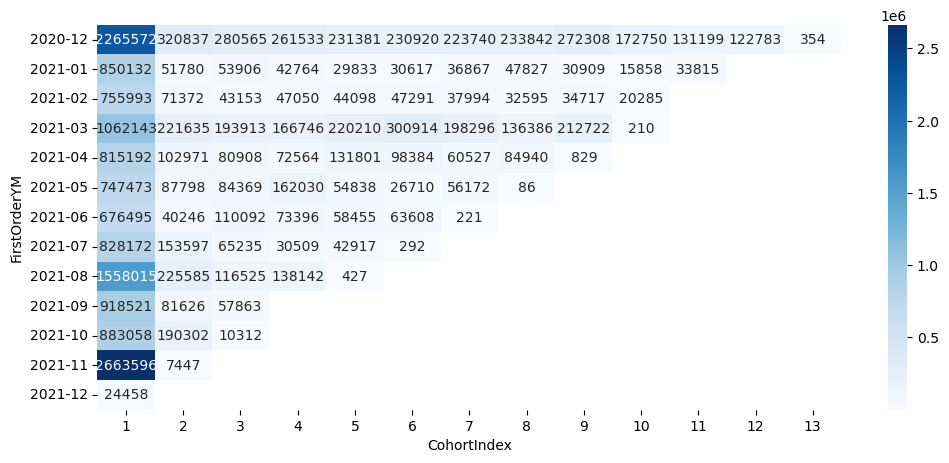

In [76]:
plt.figure(figsize=(12,5))
sns.heatmap(cohort_total_price, cmap="Blues", annot=True, fmt=".0f")

### MAU (Monthly Active User)


In [79]:
MAU = df.groupby("OrderYM")["user_id"].nunique()
MAU

OrderYM
2020-12    4241
2021-01    2083
2021-02    2066
2021-03    2593
2021-04    1885
2021-05    1847
2021-06    1821
2021-07    2125
2021-08    2743
2021-09    2091
2021-10    1962
2021-11    4352
2021-12      78
Name: user_id, dtype: int64

<Axes: xlabel='orderYM'>

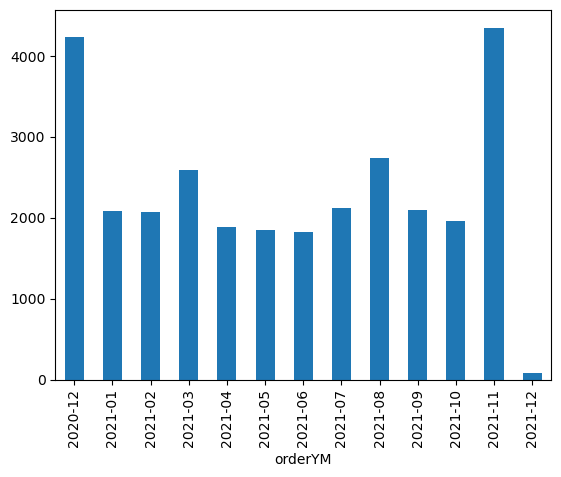

In [43]:
MAU.plot.bar()

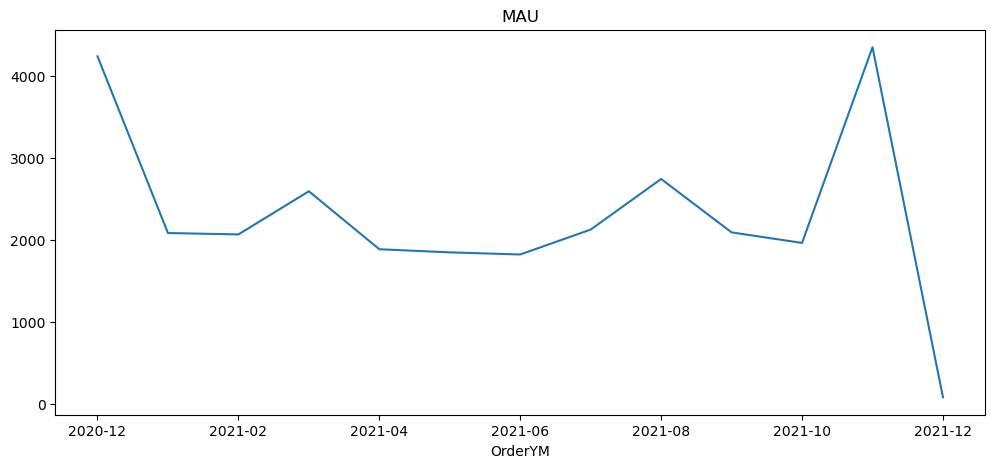

In [81]:
MAU.plot(figsize=(12,5), title= "MAU");

In [46]:
df.groupby("orderYM").agg({"order_id":"count",
                           "category_id":"nunique",
                          "user_id":"nunique",
                          "price":"mean",
                          "quantity":"sum",
                          "TotalPrice":"sum"})

,order_id,category_id,user_id,price,quantity,TotalPrice
orderYM,,,,,,
2020-12,7375,13,4241,308.241087,7375,2265571.99
2021-01,3597,11,2083,326.721247,3597,1170968.95
2021-02,3474,12,2066,314.821510,3474,1088337.96
2021-03,4587,12,2593,318.521576,4587,1448954.65
2021-04,3865,14,1885,355.133900,3865,1354125.56
2021-05,4080,12,1847,347.420285,4080,1352159.75
2021-06,4116,13,1821,342.947323,4116,1310401.72
2021-07,4646,14,2125,363.872558,4646,1563560.38
2021-08,7608,20,2743,418.236043,7608,2774577.91
